<a href="https://colab.research.google.com/github/JustMichele/TCC-PUCRS/blob/main/TCC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Hotel Colline France

## 1ª parte, análise de dados

In [ ]:
#Principais bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#Ferramentas do nltk
import re, nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

#Modelagem
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

from IPython.core.interactiveshell import InteractiveShell #permite rodar mais de um comando por célula
InteractiveShell.ast_node_interactivity = 'all'

In [ ]:
df = pd.read_csv('hotelcolline.csv', index_col=None, sep = ',')
df.head(30)

,Nota,Data,Comentario,Estadia
0,10,28 de maio de 2022,NaN,Viagem de 4 diárias
1,10,27 de maio de 2022,NaN,"Raphael, viagem de 3 diárias"
2,10,17 de maio de 2022,NaN,"Henrique, viagem de 1 diária"
3,10,2 de maio de 2022,NaN,"Andre, viagem de 2 diárias"
4,10,26 de abril de 2022,NaN,"ELZO, viagem em família de 5 diárias"
5,10,16 de abril de 2022,NaN,NaN
6,8,16 de abril de 2022,Estadia sensacional. Hotel lindo e confortável...,"MERCEDES, viagem de 2 diárias"
7,10,10 de abril de 2022,NaN,NaN
8,10,10 de abril de 2022,Para um hotel que foi considerado o melhor do ...,"TERESA CRISTINA, viagem de 2 diárias"
9,10,5 de abril de 2022,NaN,"JANAINA, viagem em família de 1 diária"


Ao fazer o shape, descobrimos a estrutura do DataFrame (253 linhas, 4 colunas)

In [ ]:
df.shape

(253, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Nota        253 non-null    int64 
 1   Data        253 non-null    object
 2   Comentario  175 non-null    object
 3   Estadia     251 non-null    object
dtypes: int64(1), object(3)
memory usage: 8.0+ KB


In [ ]:
df.dtypes

Nota           int64
Data          object
Comentario    object
Estadia       object
dtype: object

In [ ]:
df.count()

Nota          253
Data          253
Comentario    175
Estadia       251
dtype: int64

Verificando valores nulos, a coluna comentário possui 78 valores nulos e Estadia com 2 valores nulos

In [ ]:
df.isnull().sum()

Nota           0
Data           0
Comentario    78
Estadia        2
dtype: int64

## Apartir daqui faremos uma análise exploratória de dados

Vamos eliminar linhas com valores nulas da coluna 'Comentario' com a função dropna e atribuir a variável comentario mesmo 

In [ ]:
comentario = df['Comentario']

In [ ]:
comentario = comentario.dropna()
comentario.head(30)

6     Estadia sensacional. Hotel lindo e confortável...
8     Para um hotel que foi considerado o melhor do ...
11    Hospedar-nos no Hotel Colline de France foi um...
12    Fantástica desde a chegada até o checkout. Pes...
13    Incrível! Maravilhosa. Todos muito prestativos...
14                                            Incrível!
15    Melhor hotel Gramado, atendimento, exclusivida...
16    Experiencia incrivel! Hotel e atendimento impe...
18    Foi maravilhoso. Atendimento excelente. Tudo p...
19    Foi incrível!!!! O atendimento deste hotel é p...
20    Hotel aconchegante, confortável, atendimento i...
21    Incrível, você deve ter essa experiência uma v...
22    Serviço excelente prestado pelos funcionários....
23    hotel incrivel, atendimento impecável, bom caf...
25      Incrível. Todos os funcionários são atenciosos.
27    Incrível! Todo staff maravilhoso!!! Com certez...
28                                       SENSACIONAL !!
29                                            Ma

Organizando Index

In [ ]:
comentario = comentario.reset_index(drop=True)
comentario.head(10)

0    Estadia sensacional. Hotel lindo e confortável...
1    Para um hotel que foi considerado o melhor do ...
2    Hospedar-nos no Hotel Colline de France foi um...
3    Fantástica desde a chegada até o checkout. Pes...
4    Incrível! Maravilhosa. Todos muito prestativos...
5                                            Incrível!
6    Melhor hotel Gramado, atendimento, exclusivida...
7    Experiencia incrivel! Hotel e atendimento impe...
8    Foi maravilhoso. Atendimento excelente. Tudo p...
9    Foi incrível!!!! O atendimento deste hotel é p...
Name: Comentario, dtype: object

Temos a variável comentario com todos os valores livres de nulos

In [ ]:
len(comentario)

175

In [ ]:
comentario.shape

(175,)

Ao tentar fazer o pré-processamento nltk deu erro de formatação, entao tive que converter para string

In [ ]:
comentario=comentario.apply(str)

Podemos dizer que no total de 253 avaliacoes, 69% tiveram comentarios

# Pré-processamento de PNL

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Etapas para a limpeza em texto:
Criamos uma lista vazia para preencher com o texto limpo.
Usando a funcao do python de looping for vamos fazer a iteracao em cada texto:

only_letters -> fazemos a limpeza retirando todos os [\W\d_] com a expressao regular (re.sub) e substituindo por espaço

Token = quebra o texto em paragrafo e em palavras

lower_case -> deixamos as palavras em minusculas

filtered_result -> filtramos as palavras stopwords fazendo o join e adicionamos para a váriavel lista=[ ] apenas palavras nao(not in) stopwords

stopwords -> sao palavras construitivas para formar uma frase mas nao corregam um significado importante. No nltk tem a opcao do portugues

In [ ]:
lista = []
stop_words = set(stopwords.words('portuguese'))
stop_words.remove('não')
stop_words.remove('nem')

for words in comentario:
  only_letters = re.sub(r"[\W\d_]+", " ",words)
  tokens = nltk.word_tokenize(only_letters)
  lower_case = [l.lower() for l in tokens]
  filtered_result = list(filter(lambda l: l not in stop_words, lower_case))
  lista.append(' '.join(filtered_result))

In [ ]:
lista

['estadia sensacional hotel lindo confortável staff educado cordial amável enxoval primeira qualidade café manhã lindo delicioso opções variadíssimas manobrista estacionamento amenidades mimos quarto champanhe petit fours realmente estadia nota dez',
 'hotel considerado melhor mundo decepcionou conceito spa resume cômodo pequeno macas massagem além disso estabelecimento sequer dispõe piscina hidro relaxamento nada obstante cabe ressaltar atendimento excelente',
 'hospedar hotel colline france experiência única incrível desde momento chegamos desde check in bem recebidos recepção equipe funcionários tratou tempo todo muita gentileza simpatia cordialidade educação profissionalismo atendimento excelência decoração hotel espetáculo todos ambientes lindos sofisticados hall entrada todo º piso bistrô jardim quarto bem decorado organizado limpo confortável cama king size maravilhosa ah mimos muitos desde recepção oferecido espumante delicioso entrarmos quarto alguns quitutes suco uva água ant

Fazendo o gráfico do WordCloud, para trazer insight das avaliacoes

<Figure size 1440x864 with 0 Axes>

(-0.5, 1999.5, 999.5, -0.5)

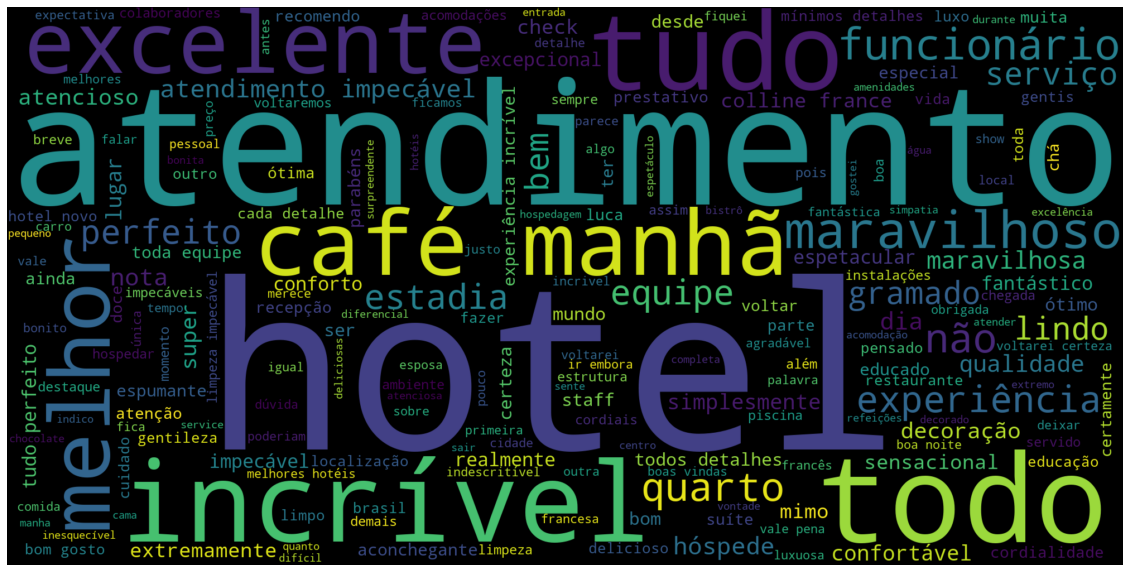

In [ ]:
unique_string=(" ").join(lista)
wordcloud = WordCloud(width = 2000, height = 1000, background_color='black').generate(unique_string)
plt.figure(figsize=(20,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Temos um insight apresentado no grafico como um dos mais mencionados 'Atendimento', 'café da manhã', 'funcionário'e muitos clientes prezam a experiencia também

In [ ]:
co = CountVectorizer(ngram_range=(1,1))
counts = co.fit_transform(lista)
important_unigrama = pd.DataFrame(counts.sum(axis=0),columns=co.get_feature_names()).T.sort_values(0,ascending=False)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Verificamos o unigrama , onde a frequencia importante é atendimento, café da manhã (da é um stopword) e tudo

In [ ]:
important_unigrama

,0
hotel,134
atendimento,83
incrível,50
tudo,49
todos,44
...,...
francesas,1
frescos,1
friendly,1
funcionam,1


In [ ]:
co = CountVectorizer(ngram_range=(2,2))
counts = co.fit_transform(lista)
important_bigrama = pd.DataFrame(counts.sum(axis=0),columns=co.get_feature_names()).T.sort_values(0,ascending=False)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


No brigrama temos uma ampla visao em palavras como: café da manhã, atendimento impecável, experiencia incrivel

In [ ]:
important_bigrama

,0
café manhã,37
atendimento impecável,17
colline france,11
hotel maravilhoso,10
tudo perfeito,10
...,...
exemplo funcionários,1
existe erro,1
existe fluxo,1
expectativa sensorial,1


In [ ]:
co = CountVectorizer(ngram_range=(3,3))
counts = co.fit_transform(lista)
important_trigrama = pd.DataFrame(counts.sum(axis=0),columns=co.get_feature_names()).T.sort_values(0,ascending=False)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


No trigrama, temos novamente termos como atendimento, cafe da manha e limpeza impecavel

Grafico de nota

In [ ]:
important_trigrama

,0
incrível atendimento impecável,4
café manhã maravilhoso,3
serviço boa noite,3
vale cada centavo,3
equipe colline france,3
...,...
excelente hotel todos,1
excelente hotel ótimo,1
excelente idem jantar,1
excelente limpo bom,1


<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'Notas do Hotel Colline de France ')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


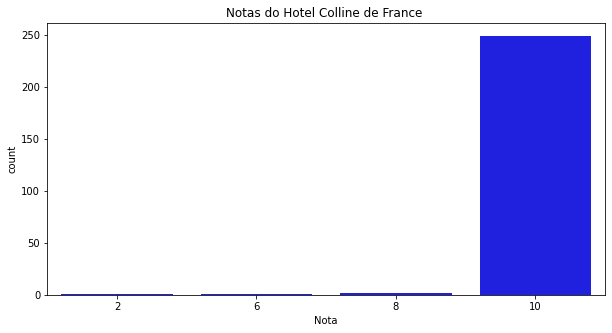

In [ ]:
plt.figure(figsize = (10,5))
plt.title("Notas do Hotel Colline de France ")
sns.countplot(df['Nota'], color= 'blue')

Porcentagem das notas

In [ ]:
percent_scores = 100*df['Nota'].value_counts()/len(df)
percent_scores

10    98.418972
8      0.790514
2      0.395257
6      0.395257
Name: Nota, dtype: float64

Por se tratar de um dos melhores hoteis do mundo, vimos que o atendimento, principalmente da equipe é uma variavel muito importante em todas as analises feita, um outro fator tambem é o cafe da manha

# Máquina Preditiva de Análise de sentimentos


Criando uma maquina de aprendizado supervisionado (rotulo)

In [ ]:
df['Sentiment_rating'] = np.where(df.Nota > 8,1,0)# criando uma nova coluna, se a nota for maior que 7 será positivo senao negativo

df = df[df.Nota != 3]#exclui o neutro

df['Sentiment_rating'].value_counts()

1    249
0      4
Name: Sentiment_rating, dtype: int64

Verificamos que temos 251 valores como positivo (1) e 2 valores negativo (0)

In [ ]:
df.head()
df['Sentiment_rating'].shape

,Nota,Data,Comentario,Estadia,Sentiment_rating
0,10,28 de maio de 2022,NaN,Viagem de 4 diárias,1
1,10,27 de maio de 2022,NaN,"Raphael, viagem de 3 diárias",1
2,10,17 de maio de 2022,NaN,"Henrique, viagem de 1 diária",1
3,10,2 de maio de 2022,NaN,"Andre, viagem de 2 diárias",1
4,10,26 de abril de 2022,NaN,"ELZO, viagem em família de 5 diárias",1


(253,)

In [ ]:
df['Comentario']=df['Comentario'].apply(str)

In [ ]:
lista2 = []
stop_words = set(stopwords.words('portuguese'))
stop_words.remove('não')
stop_words.remove('nem')

for words in df['Comentario']:
  only_letters = re.sub(r"[\W\d_]+", " ",words)
  tokens = nltk.word_tokenize(only_letters)
  lower_case = [l.lower() for l in tokens]
  filtered_result = list(filter(lambda l: l not in stop_words, lower_case))
  lista2.append(' '.join(filtered_result))

In [ ]:
lista2

['nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'estadia sensacional hotel lindo confortável staff educado cordial amável enxoval primeira qualidade café manhã lindo delicioso opções variadíssimas manobrista estacionamento amenidades mimos quarto champanhe petit fours realmente estadia nota dez',
 'nan',
 'hotel considerado melhor mundo decepcionou conceito spa resume cômodo pequeno macas massagem além disso estabelecimento sequer dispõe piscina hidro relaxamento nada obstante cabe ressaltar atendimento excelente',
 'nan',
 'nan',
 'hospedar hotel colline france experiência única incrível desde momento chegamos desde check in bem recebidos recepção equipe funcionários tratou tempo todo muita gentileza simpatia cordialidade educação profissionalismo atendimento excelência decoração hotel espetáculo todos ambientes lindos sofisticados hall entrada todo º piso bistrô jardim quarto bem decorado organizado limpo confortável cama king size maravilhosa ah mimos muitos desde recepção oferecid

In [ ]:
co_counts = CountVectorizer(stop_words =set(stopwords.words('portuguese')),ngram_range=(1,4))#unigrama para trigrama 
co_data = co_counts.fit_transform(lista2)#criacao de matriz esparca, cada palavra e sua frequencia sera um feature 

In [ ]:
co_data

<253x8937 sparse matrix of type '<class 'numpy.int64'>'
	with 11143 stored elements in Compressed Sparse Row format>

Separando dados em treino e teste, com o teste 30% e treino 70%

Eixo X -> co_data (features)
eixo Y -> sentiment_rating

In [ ]:
X_train_co, X_test_co, y_train_co, y_test_co= train_test_split(co_data,
                                                               df['Sentiment_rating'],
                                                               test_size = 0.3,
                                                               random_state=7)

Vimos que o modelo está com overfitting, o motivo seria pelo comentarios positvos serem de maior dominio

In [ ]:
y_test_co.value_counts()/y_test_co.shape[0]

1    1.0
Name: Sentiment_rating, dtype: float64

In [ ]:
lr_model = LogisticRegression()

In [ ]:
lr_model.fit(X_train_co, y_train_co)

LogisticRegression()

Metricas de avaliacao

In [ ]:
test_pred = lr_model.predict(X_test_co)

print("Acurácia: ", accuracy_score(y_test_co,test_pred))
print("F1 score: ", f1_score(y_test_co, test_pred))

Acurácia:  1.0
F1 score:  1.0


In [ ]:
print("Confusion Matrix", confusion_matrix(y_test_co, test_pred))

Confusion Matrix [[76]]


In [ ]:
lr_weights = pd.DataFrame(list(zip(co_counts.get_feature_names(),
                                   lr_model.coef_[0])),
                          columns=['words', 'weights'])

Positive_sentiments = pd.DataFrame(lr_weights.sort_values(['weights'], ascending=False)[:15])
Positive_sentiments

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,words,weights
566,atendimento,0.296046
4006,hotel,0.262703
4600,incrível,0.189771
8225,todos,0.135709
8434,tudo,0.130697
4458,impecável,0.122583
2976,excelente,0.109797
5427,maravilhoso,0.108082
3157,experiência,0.095534
6383,perfeito,0.094810


In [ ]:
Negative_sentiments = pd.DataFrame(lr_weights.sort_values(['weights'], ascending=False)[-15:])#15 ultimos 
Negative_sentiments

,words,weights
5005,lindo confortável,-0.069161
5006,lindo confortável staff,-0.069161
5007,lindo confortável staff educado,-0.069161
4157,hotel lindo confortável staff,-0.069161
5011,lindo delicioso,-0.069161
5012,lindo delicioso opções,-0.069161
5013,lindo delicioso opções variadíssimas,-0.069161
6719,primeira qualidade,-0.069161
2230,dez,-0.069161
6720,primeira qualidade café,-0.069161


### Capcana hotel

Vamos ler o arquivo do review do Capcana Hotel situada em São Paulo

In [ ]:
df2 = pd.read_csv('Capcana hotel sao paulo.csv', index_col=None, sep = ',')
df2.head(30)

,Nota,Data,Comentario,Estadia
0,10,20 de maio de 2022,NaN,"Umberlei, viagem de 2 diárias"
1,6,16 de maio de 2022,Os pombos moram no espaço atrás do ar condicio...,"Michelle, viagem com amigos de 2 diárias"
2,10,15 de maio de 2022,NaN,"Vitoria, viagem de 2 diárias"
3,10,11 de maio de 2022,NaN,"Dandara, viagem de negócios de 1 diária"
4,8,9 de maio de 2022,NaN,"Márcia Regina Migliori, viagem de 2 diárias"
5,10,8 de maio de 2022,NaN,"Alda, viagem de 1 diária"
6,10,6 de maio de 2022,NaN,"Frede, viagem de 4 diárias"
7,10,5 de maio de 2022,NaN,"José Rodolfo, viagem de 2 diárias"
8,10,4 de maio de 2022,NaN,"Maria Cecília Santos, viagem de negócios de 2 ..."
9,8,1 de maio de 2022,NaN,"Rosemeire, viagem em família de 2 diárias"


Possui 270 linhas e 4 colunas

In [ ]:
df2.shape

(270, 4)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Nota        270 non-null    int64 
 1   Data        270 non-null    object
 2   Comentario  171 non-null    object
 3   Estadia     260 non-null    object
dtypes: int64(1), object(3)
memory usage: 8.6+ KB


In [ ]:
df2.dtypes

Nota           int64
Data          object
Comentario    object
Estadia       object
dtype: object

Na coluna 'Comentario'possui 99 valores nulos e na 'Estadia' 10 valores nulos

In [ ]:
df2.isnull().sum()

Nota           0
Data           0
Comentario    99
Estadia       10
dtype: int64

Análise exploratória dos dados

In [ ]:
comentario2 = df2['Comentario']

In [ ]:
comentario2

0                                                    NaN
1      Os pombos moram no espaço atrás do ar condicio...
2                                                    NaN
3                                                    NaN
4                                                    NaN
                             ...                        
265    Não gostei muito do hotel, por ter sido uma vi...
266    O quarto tem um tamanho razoável porém o banhe...
267    Quarto muito bom..cama confortável e bem grand...
268    Foi um estadia curta, porém gostamos muito, em...
269    Achei que deveriam melhorar a limpeza em todos...
Name: Comentario, Length: 270, dtype: object

In [ ]:
comentario2 = comentario2.dropna()
comentario2.head(30)

1     Os pombos moram no espaço atrás do ar condicio...
10    Razoável, pelo preço da região. Não havia copo...
14    Hotel ruim, com manutenção e limpeza precárias...
15                                                 Amei
16        Estadia boa, cafe ótimo! Só elevadores velhos
18    O atendimento do hotel é decepcionante, uma or...
21    Localização incrível, porém o hotel ainda pass...
22    Boa estadia, ótimo custo benefício para essa r...
23    Hotel bem localizado, próximo a Paulista, quar...
26    A excessao do recepcionista Jonatas todos os d...
28    O hotel estava com as portas fechadas e ficamo...
29    Deram nos um quarto muito pequeno. Da outra ve...
30                     ESTADIA NORMAL. BOA LOCALIZAÇÃO.
31    O hotel é muito bem localizados, os quartos sa...
32    Hotel antigo mas muito bem localizado, atendeu...
33    Localização excelente, quarto justo, chuveiro ...
36    Funcionários super educados, tentam resolver t...
38          Adorei minha estadia! Voltarei com c

In [ ]:
comentario2 = comentario2.reset_index(drop=True)

In [ ]:
comentario2

0      Os pombos moram no espaço atrás do ar condicio...
1      Razoável, pelo preço da região. Não havia copo...
2      Hotel ruim, com manutenção e limpeza precárias...
3                                                   Amei
4          Estadia boa, cafe ótimo! Só elevadores velhos
                             ...                        
166    Não gostei muito do hotel, por ter sido uma vi...
167    O quarto tem um tamanho razoável porém o banhe...
168    Quarto muito bom..cama confortável e bem grand...
169    Foi um estadia curta, porém gostamos muito, em...
170    Achei que deveriam melhorar a limpeza em todos...
Name: Comentario, Length: 171, dtype: object

In [ ]:
len(comentario2)

171

In [ ]:
comentario2=comentario2.apply(str)

In [ ]:
lista3 = []
stop_words = set(stopwords.words('portuguese'))

stop_words.remove('não')
stop_words.remove('nem')

for words in comentario2:
  only_letters = re.sub(r"[\W\d_]+", " ",words)
  tokens = nltk.word_tokenize(only_letters)
  lower_case = [l.lower() for l in tokens]
  filtered_result = list(filter(lambda l: l not in stop_words, lower_case))
  lista3.append(' '.join(filtered_result))

In [ ]:
lista3

['pombos moram espaço atrás ar condicionado podiam colocar tela atrás p impedir entrada fazem barulho infernal noite inteira não deixam dormir',
 'razoável preço região não havia copos quarto precisei descer recepção pegar',
 'hotel ruim manutenção limpeza precárias experiência nada agradável nunca',
 'amei',
 'estadia boa cafe ótimo elevadores velhos',
 'atendimento hotel decepcionante organização totalmente engessada não pensa cliente chegamos duas horas antes check in tratados errados nem sequer ofereceram serviço guarda malas aguardar horário tendo perguntar sobre ainda interesse oferecer retornamos então realizar check in hora meia ainda realizando limpeza quarto realizamos checkout ficamos esperando condução solicitamos uso banheiro simplesmente disseram não poderíamos usar nenhum dependências hotel não pagando serviço não interessante hotel',
 'localização incrível porém hotel ainda passa imagem antigo banheiros não parecem tão limpos possuem musgos pior não fizeram hoje estorno

Vamos obter insight pelo wordcloud

<Figure size 1440x864 with 0 Axes>

(-0.5, 1999.5, 999.5, -0.5)

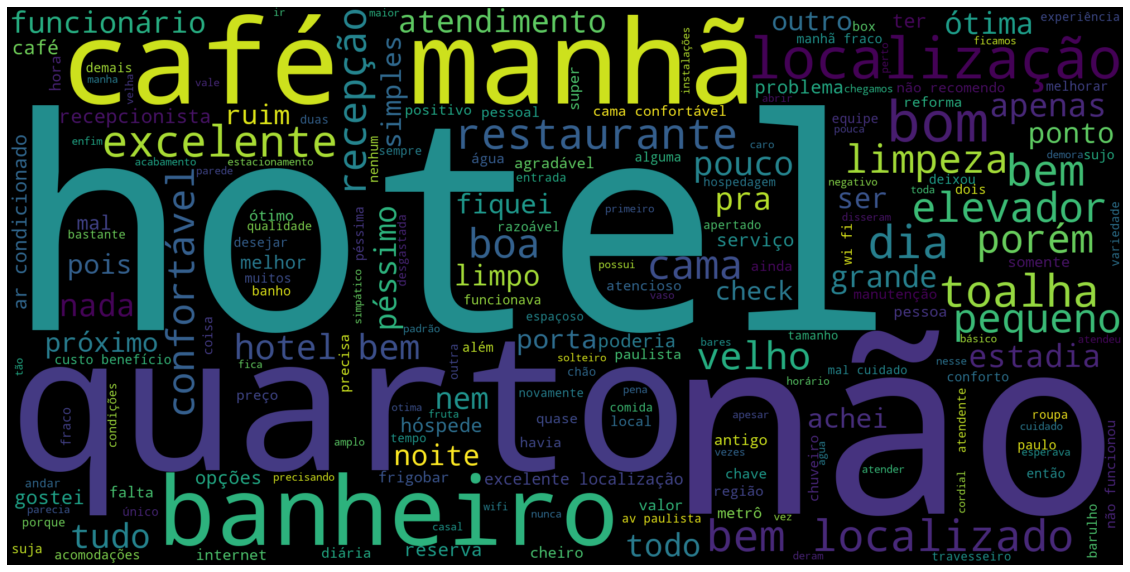

In [ ]:
unique_string=(" ").join(lista3)
wordcloud = WordCloud(width = 2000, height = 1000, background_color='black').generate(unique_string)
plt.figure(figsize=(20,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
co2 = CountVectorizer(ngram_range=(1,1))
counts2 = co2.fit_transform(lista3)
unigrama = pd.DataFrame(counts2.sum(axis=0),columns=co2.get_feature_names()).T.sort_values(0,ascending=False)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
unigrama

,0
hotel,128
não,111
quarto,88
café,71
manhã,63
...,...
metade,1
metro,1
coragem,1
mexer,1


In [ ]:
co2 = CountVectorizer(ngram_range=(2,2))
counts2 = co2.fit_transform(lista3)
bigrama = pd.DataFrame(counts2.sum(axis=0),columns=co2.get_feature_names()).T.sort_values(0,ascending=False)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
bigrama

,0
café manhã,61
bem localizado,21
hotel bem,17
ar condicionado,10
excelente localização,9
...,...
falta decoração,1
falta limpeza,1
falta pouco,1
falta respeito,1


In [ ]:
co2 = CountVectorizer(ngram_range=(3,3))
counts2 = co2.fit_transform(lista3)
trigrama = pd.DataFrame(counts2.sum(axis=0),columns=co2.get_feature_names()).T.sort_values(0,ascending=False)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
trigrama

,0
hotel bem localizado,14
café manhã fraco,6
café manhã bom,5
café manhã simples,4
café manhã bem,4
...,...
excelente estrutura hotel,1
excelente funcionários atenciosos,1
excelente funcionários simpáticos,1
excelente hospedagem recepção,1


Gráfico das notas 

<Figure size 720x360 with 0 Axes>

Text(0.5, 1.0, 'Notas do Hotel Capcana ')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


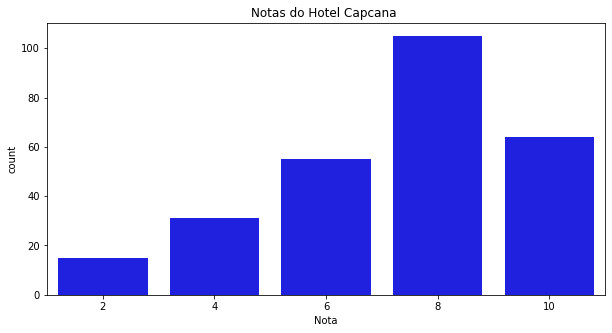

In [ ]:
plt.figure(figsize = (10,5))
plt.title("Notas do Hotel Capcana ")
sns.countplot(df2['Nota'], color= 'blue')

Porcentagem das notas

In [ ]:
percent_scores2 = 100*df2['Nota'].value_counts()/len(df2)
percent_scores2

8     38.888889
10    23.703704
6     20.370370
4     11.481481
2      5.555556
Name: Nota, dtype: float64

Análise de Sentimentos

In [ ]:
df3 = df2.dropna()

In [ ]:
df3.head()

,Nota,Data,Comentario,Estadia
1,6,16 de maio de 2022,Os pombos moram no espaço atrás do ar condicio...,"Michelle, viagem com amigos de 2 diárias"
10,6,1 de maio de 2022,"Razoável, pelo preço da região. Não havia copo...","JOAO, viagem de 1 diária"
14,2,25 de abril de 2022,"Hotel ruim, com manutenção e limpeza precárias...",Viagem em família de 2 diárias
15,10,24 de abril de 2022,Amei,"Bruno, viagem com amigos de 1 diária"
16,8,19 de abril de 2022,"Estadia boa, cafe ótimo! Só elevadores velhos","Danilo, viagem de 2 diárias"


In [ ]:
df3['Sentiment_rating'] = np.where(df3.Nota > 7,1,0)# criando uma nova coluna, se a nota for maior que 7 será positivo senao negativo

df3 = df3[df3.Nota != 3]#exclui o neutro

df3['Sentiment_rating'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


1    88
0    78
Name: Sentiment_rating, dtype: int64

<Figure size 576x432 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


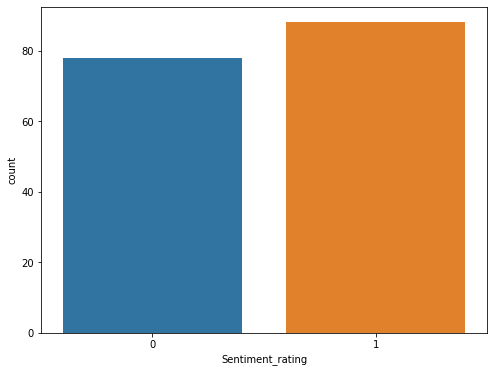

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(df3['Sentiment_rating'])
plt.show()

In [ ]:
df3.head(30)
df3['Sentiment_rating'].shape

,Nota,Data,Comentario,Estadia,Sentiment_rating
1,6,16 de maio de 2022,Os pombos moram no espaço atrás do ar condicio...,"Michelle, viagem com amigos de 2 diárias",0
10,6,1 de maio de 2022,"Razoável, pelo preço da região. Não havia copo...","JOAO, viagem de 1 diária",0
14,2,25 de abril de 2022,"Hotel ruim, com manutenção e limpeza precárias...",Viagem em família de 2 diárias,0
15,10,24 de abril de 2022,Amei,"Bruno, viagem com amigos de 1 diária",1
16,8,19 de abril de 2022,"Estadia boa, cafe ótimo! Só elevadores velhos","Danilo, viagem de 2 diárias",1
18,4,18 de abril de 2022,"O atendimento do hotel é decepcionante, uma or...","PETTRA, viagem de negócios de 2 diárias",0
21,6,17 de abril de 2022,"Localização incrível, porém o hotel ainda pass...","Juliana, viagem de 1 diária",0
22,8,16 de abril de 2022,"Boa estadia, ótimo custo benefício para essa r...","Sonia F G Santos, viagem de negócios de 1 diária",1
23,8,13 de abril de 2022,"Hotel bem localizado, próximo a Paulista, quar...","Emmanoel, viagem de 2 diárias",1
26,4,2 de abril de 2022,A excessao do recepcionista Jonatas todos os d...,"LUIZ fernando, viagem de negócios de 2 diárias",0


(166,)

In [ ]:
df3['Comentario']=df3['Comentario'].apply(str)

In [ ]:
lista4 = []
stop_words = set(stopwords.words('portuguese'))

stop_words.remove('não')
stop_words.remove('nem')

for words in df3['Comentario']:
  only_letters = re.sub(r"[\W\d_]+", " ",words)
  tokens = nltk.word_tokenize(only_letters)
  lower_case = [l.lower() for l in tokens]
  filtered_result = list(filter(lambda l: l not in stop_words, lower_case))
  lista4.append(' '.join(filtered_result))

In [ ]:
lista4

['pombos moram espaço atrás ar condicionado podiam colocar tela atrás p impedir entrada fazem barulho infernal noite inteira não deixam dormir',
 'razoável preço região não havia copos quarto precisei descer recepção pegar',
 'hotel ruim manutenção limpeza precárias experiência nada agradável nunca',
 'amei',
 'estadia boa cafe ótimo elevadores velhos',
 'atendimento hotel decepcionante organização totalmente engessada não pensa cliente chegamos duas horas antes check in tratados errados nem sequer ofereceram serviço guarda malas aguardar horário tendo perguntar sobre ainda interesse oferecer retornamos então realizar check in hora meia ainda realizando limpeza quarto realizamos checkout ficamos esperando condução solicitamos uso banheiro simplesmente disseram não poderíamos usar nenhum dependências hotel não pagando serviço não interessante hotel',
 'localização incrível porém hotel ainda passa imagem antigo banheiros não parecem tão limpos possuem musgos pior não fizeram hoje estorno

In [ ]:
co_counts3 = CountVectorizer(stop_words =set(stopwords.words('portuguese')),ngram_range=(1,4))#unigrama para trigrama 
co_data2 = co_counts3.fit_transform(lista4)#criacao de matriz esparca, cada palavra e sua frequencia sera um feature 

In [ ]:
co_data2

<166x9945 sparse matrix of type '<class 'numpy.int64'>'
	with 12274 stored elements in Compressed Sparse Row format>

In [ ]:
X_train_co2, X_test_co2, y_train_co2, y_test_co2= train_test_split(co_data2,
                                                               df3['Sentiment_rating'],
                                                               test_size = 0.4,
                                                               random_state=6)

In [ ]:
y_test_co2.value_counts()/y_test_co2.shape[0]

1    0.597015
0    0.402985
Name: Sentiment_rating, dtype: float64

In [ ]:
lr_model2 = LogisticRegression()

In [ ]:
lr_model2.fit(X_train_co2, y_train_co2)

LogisticRegression()

In [ ]:
test_pred2 = lr_model2.predict(X_test_co2)

print("Acurácia: ", accuracy_score(y_test_co2,test_pred2))
print("F1 score: ", f1_score(y_test_co2, test_pred2))

Acurácia:  0.7611940298507462
F1 score:  0.8260869565217392


Confusion Matrix AxesSubplot(0.125,0.125;0.62x0.755)


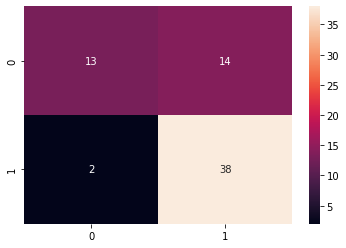

In [ ]:
print("Confusion Matrix", sns.heatmap(confusion_matrix(y_test_co2, test_pred2), annot=True))

In [ ]:
lr_weights2 = pd.DataFrame(list(zip(co_counts3.get_feature_names(),
                                   lr_model2.coef_[0])),
                          columns=['words', 'weights'])

Positive_sentiments2 = pd.DataFrame(lr_weights2.sort_values(['weights'], ascending=False)[:15])
Positive_sentiments2

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,words,weights
1244,bom,0.510892
1024,bem,0.427336
155,agradável,0.356446
3430,excelente,0.342737
5217,localizado,0.261208
1100,bem localizado,0.261208
321,amei,0.251934
5280,localização,0.250175
8753,simples,0.238892
691,atendeu necessidade,0.235538


In [ ]:
Negative_sentiments = pd.DataFrame(lr_weights2.sort_values(['weights'], ascending=False)[-15:])#15 ultimos 
Negative_sentiments

,words,weights
3196,equipe,-0.209806
4224,havia,-0.213817
7383,problemas,-0.219390
8042,recepção,-0.250734
2989,elevador,-0.255779
5677,manutenção,-0.260914
455,apenas,-0.286096
9665,velho,-0.289201
4365,hotel,-0.297292
5443,mal,-0.313165


Com Bow

In [ ]:
vectorizer = CountVectorizer(binary=True)
texto = lista4
X_bow = vectorizer.fit_transform(texto)

In [ ]:
X_bow.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
print(X_bow.shape, type(X_bow))

(166, 1276) <class 'scipy.sparse.csr.csr_matrix'>


In [ ]:
tfidf_vect = TfidfVectorizer()
X_tfidf = tfidf_vect.fit_transform(texto)

In [ ]:
print(X_tfidf)

  (0, 362)	0.2045593468669919
  (0, 305)	0.21699632800913732
  (0, 786)	0.08606821045143138
  (0, 614)	0.23452526841325105
  (0, 774)	0.16494655328580138
  (0, 603)	0.23452526841325105
  (0, 132)	0.18036621261262756
  (0, 469)	0.23452526841325105
  (0, 392)	0.19491247483206053
  (0, 587)	0.23452526841325105
  (0, 1161)	0.23452526841325105
  (0, 230)	0.21699632800913732
  (0, 882)	0.23452526841325105
  (0, 252)	0.16082613348077665
  (0, 83)	0.16082613348077665
  (0, 113)	0.4690505368265021
  (0, 415)	0.21699632800913732
  (0, 736)	0.23452526841325105
  (0, 886)	0.23452526841325105
  (1, 848)	0.38389951913232384
  (1, 995)	0.23245369460836504
  (1, 325)	0.3348476495841134
  (1, 913)	0.38389951913232384
  (1, 960)	0.13975463361987908
  (1, 276)	0.38389951913232384
  :	:
  (165, 124)	0.21227916060821167
  (165, 49)	0.21227916060821167
  (165, 339)	0.19641294380133054
  (165, 488)	0.19641294380133054
  (165, 280)	0.18515568382581818
  (165, 338)	0.19641294380133054
  (165, 430)	0.1851556838

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X_bow, df3['Sentiment_rating'],
                                                     test_size=0.3, random_state = 10)

X2_train, X2_test, y2_train, y2_test = train_test_split(X_tfidf, df3['Sentiment_rating'],
                                                        test_size=0.3, random_state = 10)

In [ ]:
def mostra_metricas(y_true, y_pred):
  
  print("Acurácia: ", accuracy_score(y_true, y_pred))
  print("\nF1-Score:", f1_score(y_true, y_pred, average='weighted'))
  print("\nMatriz de confusão:")
  sns.heatmap(confusion_matrix(y_true, y_pred), annot=True)
  plt.show()

Regressao Logistica com texto vetorizado com Bow

In [ ]:
reglog = LogisticRegression()

In [ ]:
reglog.fit(X1_train, y1_train)

LogisticRegression()

In [ ]:
y1_reglog_pred = reglog.predict(X1_test)

Acurácia:  0.68

F1-Score: 0.6789743589743591

Matriz de confusão:


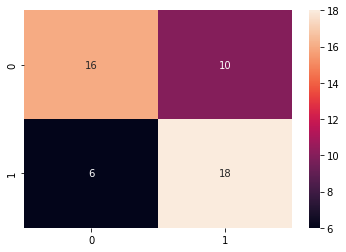

In [ ]:
mostra_metricas(y1_test, y1_reglog_pred)

Agora texto vetorizado com tf-idf

In [ ]:
reglog2 = LogisticRegression()

reglog2.fit(X2_train, y2_train)

y2_reglog_pred = reglog2.predict(X2_test)

LogisticRegression()

Acurácia:  0.74

F1-Score: 0.7384343637093537

Matriz de confusão:


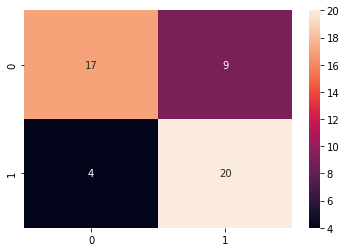

In [ ]:
mostra_metricas(y2_test, y2_reglog_pred)

Naive Bayes Multinomial

Bow

In [ ]:
from sklearn.naive_bayes import MultinomialNB

MultinomialNB()

Acurácia:  0.64

F1-Score: 0.6388461538461538

Matriz de confusão:


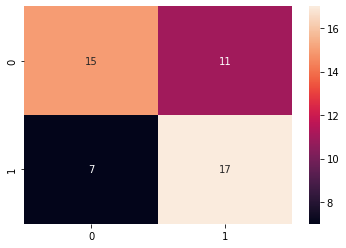

In [ ]:
nb1 = MultinomialNB()

nb1.fit(X1_train.toarray(), y1_train)

y1_gnb_pred = nb1.predict(X1_test.toarray())

mostra_metricas(y1_test, y1_gnb_pred)

Tf-idf

MultinomialNB()

Acurácia:  0.68

F1-Score: 0.6694909688013136

Matriz de confusão:


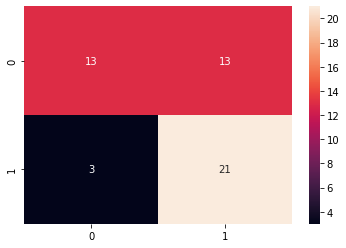

In [ ]:
nb2 = MultinomialNB()

nb2.fit(X2_train.toarray(), y2_train)

y2_gnb_pred = nb2.predict(X2_test.toarray())

mostra_metricas(y2_test, y2_gnb_pred)

Random Forest

Bow

RandomForestClassifier()

Acurácia:  0.64

F1-Score: 0.6329870129870129

Matriz de confusão:


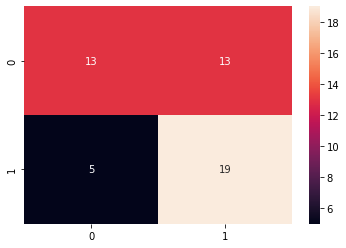

In [ ]:
rf1 = RandomForestClassifier()

rf1.fit(X1_train, y1_train)

y1_dt_pred = rf1.predict(X1_test)

mostra_metricas(y1_test, y1_dt_pred)

Tf-idf

RandomForestClassifier()

Acurácia:  0.58

F1-Score: 0.5547540983606558

Matriz de confusão:


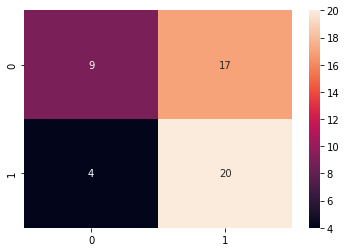

In [ ]:
rf2 = RandomForestClassifier()

rf2.fit(X2_train, y2_train)

y2_dt_pred = rf2.predict(X2_test)

mostra_metricas(y2_test, y2_dt_pred)